In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [44]:
transactions=pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [45]:
customer = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv")
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [46]:
prod_cat_info = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [55]:
merged_df = pd.merge(transactions,customer,left_on='cust_id', right_on='customer_Id', how='left')
customer_Final = pd.merge(merged_df, prod_cat_info, left_on=['prod_cat_code', 'prod_subcat_code'],
                           right_on=['prod_cat_code', 'prod_sub_cat_code'], how='left')
customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


### 2. Prepare a summary report for the merged data set.
###  a. Get the column names and their corresponding data type

In [57]:
customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

### b. Top/Bottom 10 observations

In [58]:
customer_Final.head(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [59]:
customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [61]:
customer_Final.describe().T.iloc[2:,3:]

,min,25%,50%,75%,max
prod_subcat_code,1.000,3.00,5.00,10.000,12.0
prod_cat_code,1.000,2.00,4.00,5.000,6.0
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5
customer_Id,266783.000,268935.00,270980.00,273114.000,275265.0
city_code,1.000,3.00,5.00,8.000,10.0
prod_sub_cat_code,1.000,3.00,5.00,10.000,12.0


### d. Frequency tables for all the categorical variables

In [63]:
customer_Final.select_dtypes('O').value_counts()

tran_date   Store_type      DOB         Gender  prod_cat          prod_subcat        
28-05-2012  e-Shop          23-03-1970  F       Footwear          Mens                   2
22-04-2012  TeleShop        17-05-1975  F       Books             Comics                 2
24-04-2012  Flagship store  01-12-1977  M       Home and kitchen  Tools                  2
16-09-2012  e-Shop          19-11-1975  M       Electronics       Personal Appliances    2
19-09-2013  TeleShop        12-03-1983  F       Home and kitchen  Kitchen                2
                                                                                        ..
19-03-2012  Flagship store  12-07-1976  M       Footwear          Women                  1
                            04-11-1981  F       Electronics       Personal Appliances    1
                            02-05-1991  M       Home and kitchen  Furnishing             1
19-03-2011  e-Shop          24-06-1987  M       Books             DIY                    1
9/9/

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

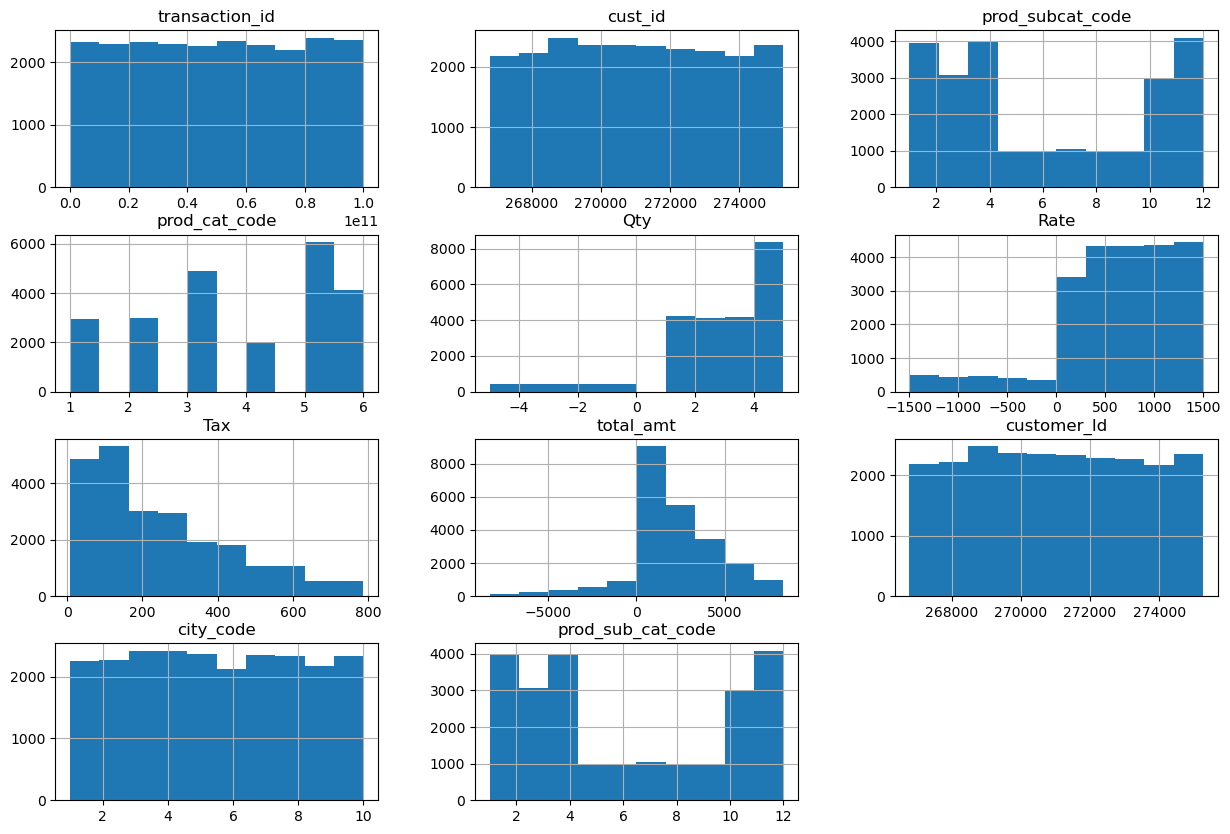

In [66]:
customer_Final.select_dtypes(include=['number','float']).hist(figsize=(15,10))
plt.show()

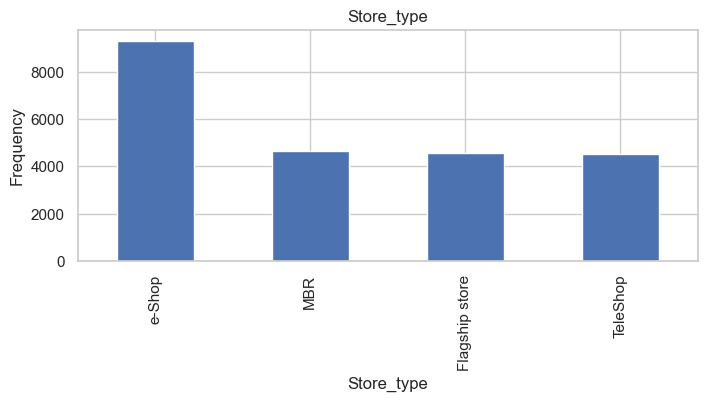

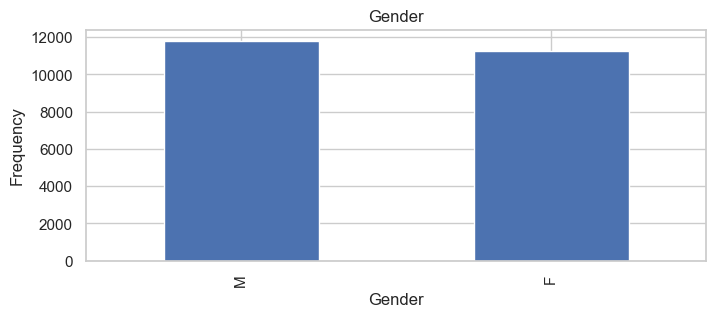

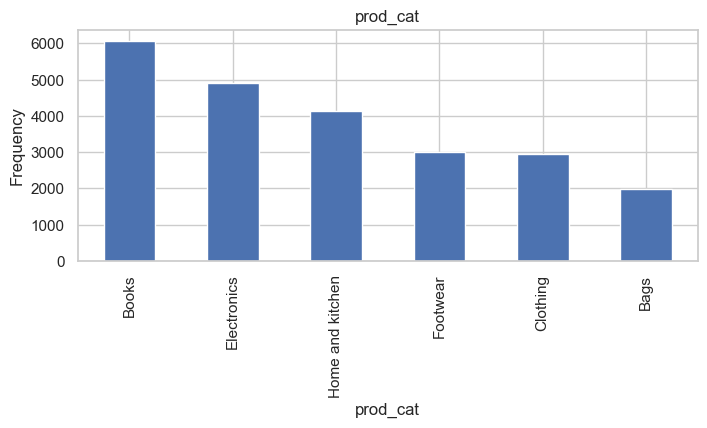

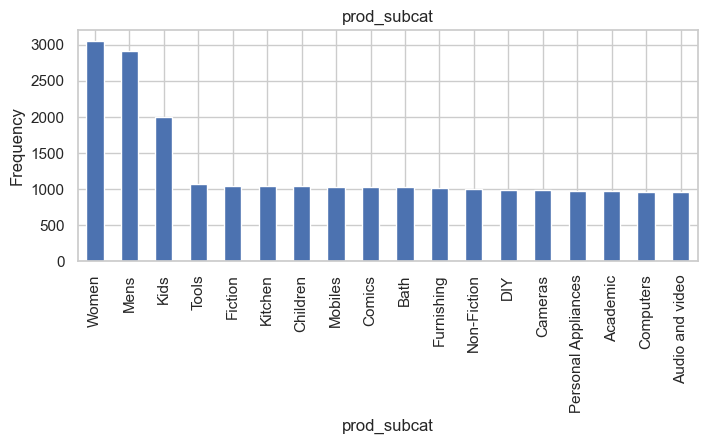

In [82]:
cols_to_select = ['Store_type', 'Gender', 'prod_cat', 'prod_subcat']
selected_cols = customer_Final[cols_to_select]

for column in selected_cols.columns:
    plt.figure() 
    selected_cols[column].value_counts().plot(kind='bar', title=column,figsize = (8,3))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [67]:
customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [68]:
customer_Final['tran_date'] = customer_Final.tran_date.str.replace('/','-')

In [75]:
customer_Final['tran_date'] = pd.to_datetime(customer_Final['tran_date'],format='%d-%m-%Y')
customer_Final['DOB'] = pd.to_datetime(customer_Final['DOB'],format='%d-%m-%Y')
print('The oldest date in the dataset is', customer_Final.tran_date.min(),'and the latest date in the dataset is ',customer_Final.tran_date.max(),'which is ',customer_Final.tran_date.max() - customer_Final.tran_date.min())

The oldest date in the dataset is 2011-01-25 00:00:00 and the latest date in the dataset is  2014-02-28 00:00:00 which is  1130 days 00:00:00


### b. Count of transactions where the total amount of transaction was negative


In [76]:
customer_Final[customer_Final.total_amt<0].total_amt.count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

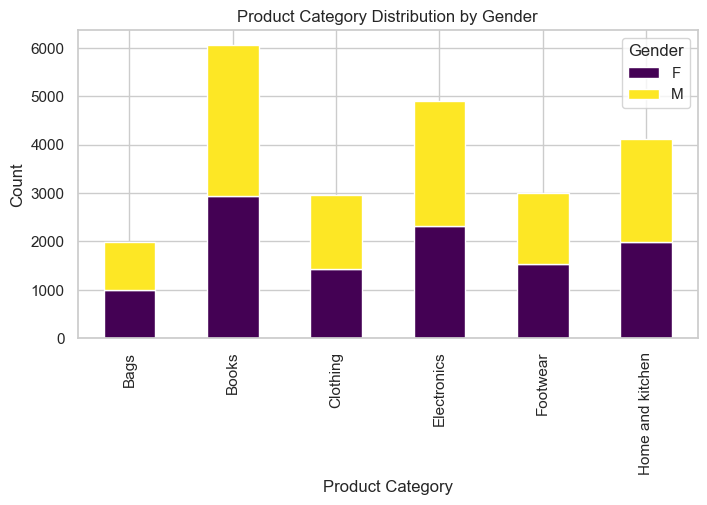

In [77]:
a = customer_Final[['Gender','prod_cat']]
gender_category_counts = a.groupby(['Gender', 'prod_cat']).size().reset_index(name='count')
gender_category_pivot = gender_category_counts.pivot(index='prod_cat', columns='Gender', values='count').fillna(0)
sns.set(style="whitegrid")
gender_category_pivot.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.title('Product Category Distribution by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [78]:
max_cust = pd.pivot_table(customer_Final,index = 'city_code' ,values = 'cust_id' , aggfunc='count' ).sort_values('cust_id',ascending = False)
max_cust

,cust_id
city_code,
4.0,2422
3.0,2411
5.0,2360
7.0,2356
10.0,2333
8.0,2330
2.0,2270
1.0,2258
9.0,2178


In [79]:
cust_percent = (max_cust.iloc[0]/max_cust.sum())* 100
b = pd.DataFrame(cust_percent,columns = {0 : 'Perc'})
b

,0
cust_id,10.509872


In [80]:
print('The city code that has maximum number of customers is ',max_cust['cust_id'].iloc[0],'and the percentage of customers from that city are ',b)

The city code that has maximum number of customers is  2422 and the percentage of customers from that city are                   0
cust_id  10.509872


### 7. Which store type sells the maximum products by value and by quantity?


In [83]:
qty = customer_Final.groupby('Store_type')['Qty'].sum().sort_values(ascending=False)
qty

Store_type
e-Shop            22763
MBR               11194
Flagship store    11133
TeleShop          10984
Name: Qty, dtype: int64

In [84]:
value = customer_Final.groupby('Store_type')['total_amt'].sum().sort_values(ascending = False )
value

Store_type
e-Shop            1.982482e+07
Flagship store    9.715688e+06
MBR               9.674486e+06
TeleShop          9.364781e+06
Name: total_amt, dtype: float64

In [86]:
print('The store that sells the maximum products by value is',value.idxmax(),'. And the one that sells maximum products by quantity is ',qty.idxmax(),'.')

The store that sells the maximum products by value is e-Shop . And the one that sells maximum products by quantity is  e-Shop .


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [87]:
electronics = customer_Final[(customer_Final['prod_cat'] == 'Electronics') & (customer_Final['Store_type'] == 'Flagship Store')]['total_amt'].sum()
Clothing = customer_Final[(customer_Final['prod_cat'] == 'Clothing') & (customer_Final['Store_type'] == 'Flagship Store')]['total_amt'].sum()
print('The total amount earned from Electronics category from Flagship Stores is', electronics)
print('The total amount earned from Clothing category from Flagship Stores is', Clothing)

The total amount earned from Electronics category from Flagship Stores is 0.0
The total amount earned from Clothing category from Flagship Stores is 0.0


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [88]:
customer_Final[(customer_Final.Gender == 'M') & (customer_Final.prod_cat == 'Electronics')]['total_amt'].sum()

5703109.424999999

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [89]:
positive_txn= customer_Final['total_amt'] > 0
utr = customer_Final.groupby('cust_id')['transaction_id'].nunique()
utr[utr > 10].count()

6

### 11. For all customers aged between 25 - 35, find out: 
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [90]:
customer_Final['age'] = ((dt.datetime.now() - customer_Final.DOB)/365).dt.days
young_df = customer_Final[(customer_Final.age >= 25) & (customer_Final.age <= 35)]
req_df = pd.DataFrame(young_df.total_amt.groupby(young_df.prod_cat).sum()).loc[['Electronics','Books']]
req_df.rename(columns={'total_amt':'25-35 age group spent'},inplace=True)
req_df

,25-35 age group spent
prod_cat,
Electronics,2227592.705
Books,2612765.870


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [96]:
young_df[(young_df['tran_date'] >= '1st Jan, 2014' ) & (young_df['tran_date']  <= '1st Mar, 2014')]['total_amt'].sum()

539989.1900000001